<a href="https://colab.research.google.com/github/Godparticle27/VC-research-study/blob/main/protocal_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import requests
import datetime



## Collect metrics from APIs and other KPIs

def fetch_defillama_protocol(protocol_name):
  # from DefiLlama
    url = f"https://api.llama.fi/protocol/{protocol_name.lower()}"
    r = requests.get(url)
    r.raise_for_status()
    return r.json()

# Test for uniswap
if 'uni' not in globals():
  uni = fetch_defillama_protocol("uniswap") #produces a dictionary
keys = uni.keys()
# print(uni.keys())


# checks if desired metrics are included in the dictionary to avoid keyerror,
# and returns an updated dictionary with desired keys
def get_protocol_metrics(protocol_dict, keys, metrics):
  ret_dict = {}
  for metric in metrics:
    if metric not in keys:
      continue
    print(f"{metric}:, {protocol_dict[metric]}")
    ret_dict[metric] = protocol_dict[metric]
  return ret_dict

fields = ["name", "category", "tvl", "mcap"]
get_protocol_metrics(uni, keys, fields)

# Basic fields
'''
print("Name:", uni["name"])
print("Category:", uni["category"])
print("TVL:", uni["tvl"])
print("Market Cap:", uni["mcap"])
'''

## automated pulling of multiple protocals
## print(type(uni))

name:, Uniswap
tvl:, [{'date': 1541203200, 'totalLiquidityUSD': 34643}, {'date': 1541289600, 'totalLiquidityUSD': 41268}, {'date': 1541376000, 'totalLiquidityUSD': 40551}, {'date': 1541462400, 'totalLiquidityUSD': 43091}, {'date': 1541548800, 'totalLiquidityUSD': 153979}, {'date': 1541635200, 'totalLiquidityUSD': 180229}, {'date': 1541721600, 'totalLiquidityUSD': 175773}, {'date': 1541808000, 'totalLiquidityUSD': 172207}, {'date': 1541894400, 'totalLiquidityUSD': 187642}, {'date': 1541980800, 'totalLiquidityUSD': 200955}, {'date': 1542067200, 'totalLiquidityUSD': 202382}, {'date': 1542153600, 'totalLiquidityUSD': 198327}, {'date': 1542240000, 'totalLiquidityUSD': 197528}, {'date': 1542326400, 'totalLiquidityUSD': 199426}, {'date': 1542412800, 'totalLiquidityUSD': 203103}, {'date': 1542499200, 'totalLiquidityUSD': 199238}, {'date': 1542585600, 'totalLiquidityUSD': 201157}, {'date': 1542672000, 'totalLiquidityUSD': 199443}, {'date': 1542758400, 'totalLiquidityUSD': 170785}, {'date': 1542

'\nprint("Name:", uni["name"])\nprint("Category:", uni["category"])\nprint("TVL:", uni["tvl"])\nprint("Market Cap:", uni["mcap"])\n'

<Axes: title={'center': 'Uniswap TVL ($)'}, xlabel='date'>

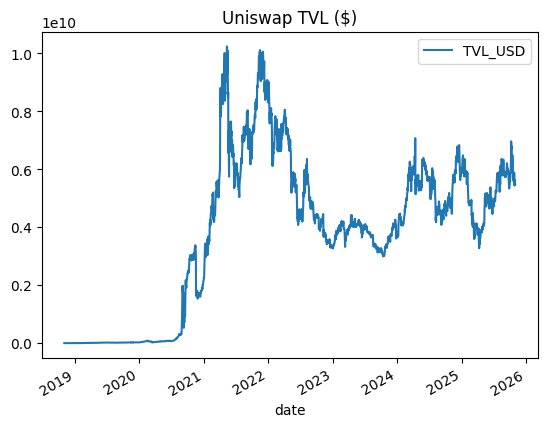

In [10]:
## TVL (Total Value Locked) is one of the key metrics for how the crypto is evaluated
## It is the product of the quantity chain tokens times the prices it is put on chain.

# construct a time series for TVL

## Returns a DataFrame with columns ['date', 'TVL_USD'].
def protocol_tvl_timeseries(protocol_name, protocal_dict):
    tvl_data = protocal_dict.get("tvl", [])
    if not tvl_data:
        raise ValueError(f"No TVL data returned for {protocol_name}")

    df = pd.DataFrame(tvl_data)
    df["date"] = pd.to_datetime(df["date"], unit="s")
    df.rename(columns={"totalLiquidityUSD": "TVL_USD"}, inplace=True)
    df = df[["date", "TVL_USD"]].dropna()
    df.sort_values("date", inplace=True)
    return df


uni_tvl = protocol_tvl_timeseries("uniswap", uni)
# print(uni_tvl.head(10))

uni_tvl.plot(x="date", y="TVL_USD", title="Uniswap TVL ($)")